<h1>Hot Pipe</h1>
Imagine a point mass (m) hanging on a massless string of length (l) in a gravitational  field (g); shown schematically
<img src="images/pendulum.png">
There is no friction. All this is an idealization, but it is one that we can easily realize in practice to a good degree of approximation. The question is what is the period of oscillation, t, for a given starting angle θ and how does it depend upon the parameters in the problem?


<h2>Import the required libraries</h2>

In [56]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from ode_helpers import state_plotter

<h2>Define the parameters and differential equations (using OdeInt and Solve_IVP)</h2>

In [57]:
#Parameters
g=9.8
l=0.2
Thetao=90*np.pi/180
Vo=0
c=0

#Differential Equations
def odef(x, t):
    y=x[0]
    dy=x[1]
    xdot=[[],[]]
    xdot[0]=dy
    xdot[1]=(g/l)*np.sin(y)
    return xdot

def ivpf(t,y,c):
    dydt=[[],[]]
    dydt[0]=y[1]
    dydt[1]=(g/l)*np.sin(y[0])
    return dydt

<h2>Initial Conditions and Solve the Differential</h2>

In [58]:
#initial conditions
n = 100
timespan = np.linspace(0, 2, n)
yinit=[Thetao,Vo]

#Solve equation
solode = odeint(odef,yinit,timespan)
solivp = solve_ivp(lambda t,y:ivpf(t,y,c), [timespan[0],timespan[-1]],yinit, t_eval = timespan)
if solivp.status != 0:
    print("WARNING: sol.status is %d" % solivp.status)
print(solivp.message)

The solver successfully reached the end of the integration interval.


<h2>Plotting</h2>

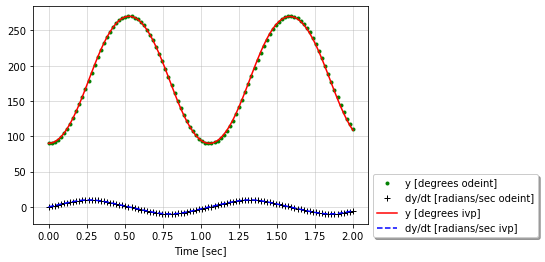

In [70]:
#plt.subplot(2, 1, 1)
plt.plot(timespan, solode[:,0]*180/np.pi, 'g.')
plt.plot(timespan, solode[:,1], 'k+')
plt.plot(solivp.t, solivp.y[0]*180/np.pi, 'r-')
plt.plot(solivp.t, solivp.y[1], 'b--')

plt.grid(alpha=0.5)
plt.legend(['y [degrees odeint]','dy/dt [radians/sec odeint]','y [degrees ivp]','dy/dt [radians/sec ivp]']
           ,framealpha=1, shadow=True,bbox_to_anchor=(1, 0.25))
plt.xlabel('Time [sec]')
plt.show()
